### Student performance indicator
#### Life cycle of machine learning project
        - understanding the problem statement
        - data collection
        - data checks to perform
        - exploratory data analysis
        - data pre-processing
        - model training
        - choose best model
### 1) Problem statement
        - This project understands how the student's is affected by other variables such as Gender, ehtnicity, parental level of education, luch and test preparation course.
### 2) Data collection
        - Dataset source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
        -The data consists of 8 column and 1000 rows.



## Importing Pandas, Numpy, Matpltlib, seabornand Warings library.

In [14]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [5]:
df = pd.read_csv('data/stud.csv')

### Show top 5 records

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [36]:
df.shape

(1000, 8)

### 2.2 Dataset information
    -  gender: sex of studnets -> (male/female)
    - race/ethnicity of students > (Group A,B,C,D)
    - parental level of education: parents final education -> (bachelor's degree, some college, master's degree,associate's degree, high school)
    - lunch: having lunch before test (standard or free/reduced)
    - test preparation course: complete or not complete before test
    - math score
    - reading score
    - writing score

### 3. Data checks to perform

    - check missing values 
    - check duplicates
    - check data types
    - check the number of unique values of each column
    - check statistics of data set
    - check various categories present in the different categorical column

### 3.1 Check Missing values

In [37]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the data set

### 3.2 Check duplicates


In [38]:
df.duplicated().sum()

np.int64(0)

### There are no duplicate values in the data set
### 3.3 Check data types

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [40]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check the statistics of the data set


In [41]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### insight
    - From the above description of numerical data, all means are very close to each other - between 66 and 68.05;
    - all the std are also close - between 14.6 and 15.19;
    - while there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading min higher = 17

### 3.7 Exploring data 

In [42]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [44]:
print('Categories in "gender" variable: ', end=" ")
print(df['gender'].unique())

print('Categories in "race_ethinicity" variable: ', end=" ")
print(df['race_ethnicity'].unique())

print('Categories in "parental_level_of_education" variable: ', end=" ")
print(df['parental_level_of_education'].unique())

print('Categories in "lunch" variable: ', end=" ")
print(df['lunch'].unique())

print('Categories in "test preparation_course" variable: ', end=" ")
print(df['test_preparation_course'].unique())


Categories in "gender" variable:  ['female' 'male']
Categories in "race_ethinicity" variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in "parental_level_of_education" variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in "lunch" variable:  ['standard' 'free/reduced']
Categories in "test preparation_course" variable:  ['none' 'completed']


In [45]:
# Assuming df is already defined
# Define numerical and categorical columns correctly using pandas dtypes
numeric_features = [feature for feature in df.columns if pd.api.types.is_numeric_dtype(df[feature])]
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']

# Print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [46]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 3.8 Adding columns for "Total Score" and "average


In [53]:
# Add columns for total score and average if not already present
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score'] / 3

# Calculate number of students with full marks in each subject
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Math: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Math: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [54]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


### Insights
    - From above values we get students have performed the worst in Maths
`   - Best performance is in reading section
### 4.Exploring Data ( Visualization )
### 4.1 Visualize average score distribution to make some conclusion.
    - Histogram
    - Kernel Distribution Function (KDE)
### 4.1.1 Histogram & KDE

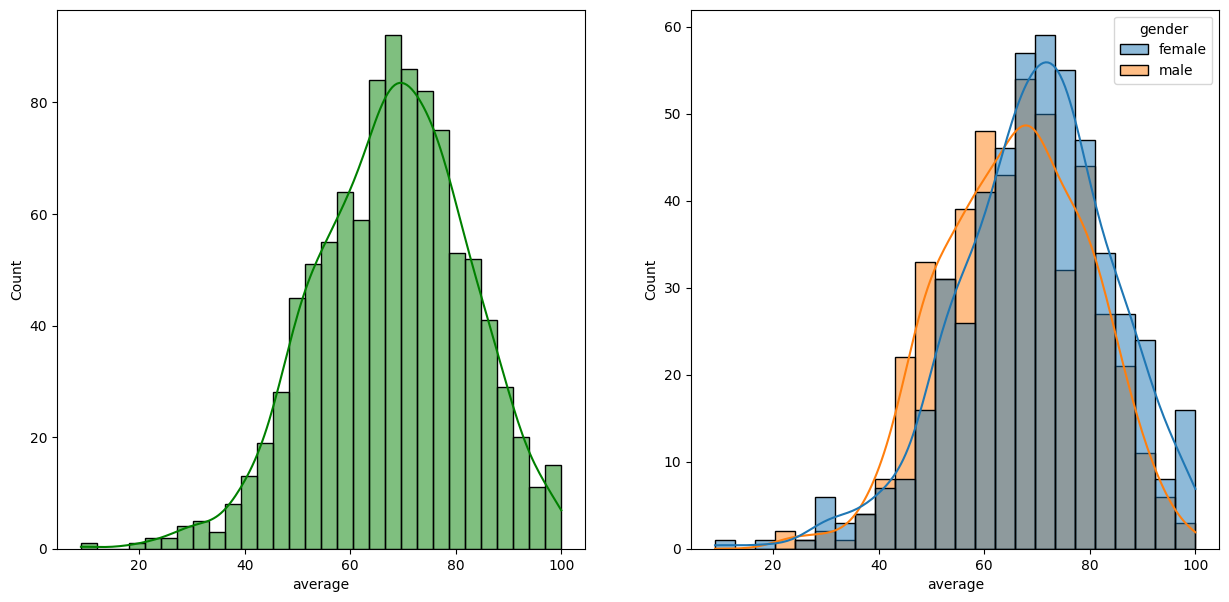

In [55]:

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

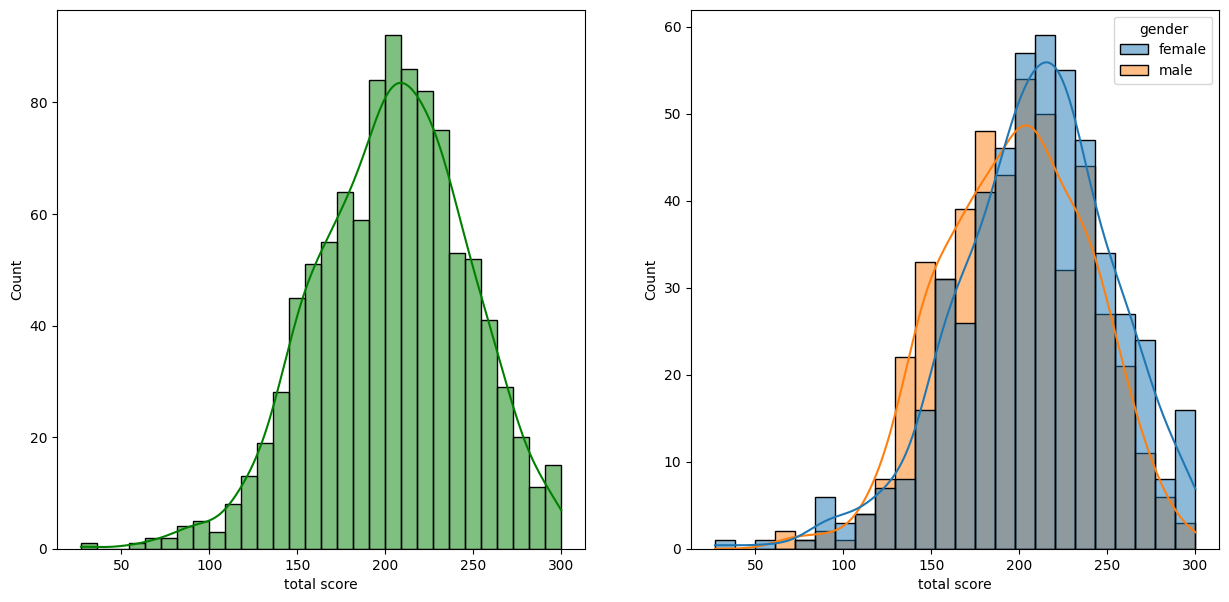

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total score', bins=30, color='g', kde=True)
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender')
plt.show()

### insights 
    - Female students tend to perform well then male students

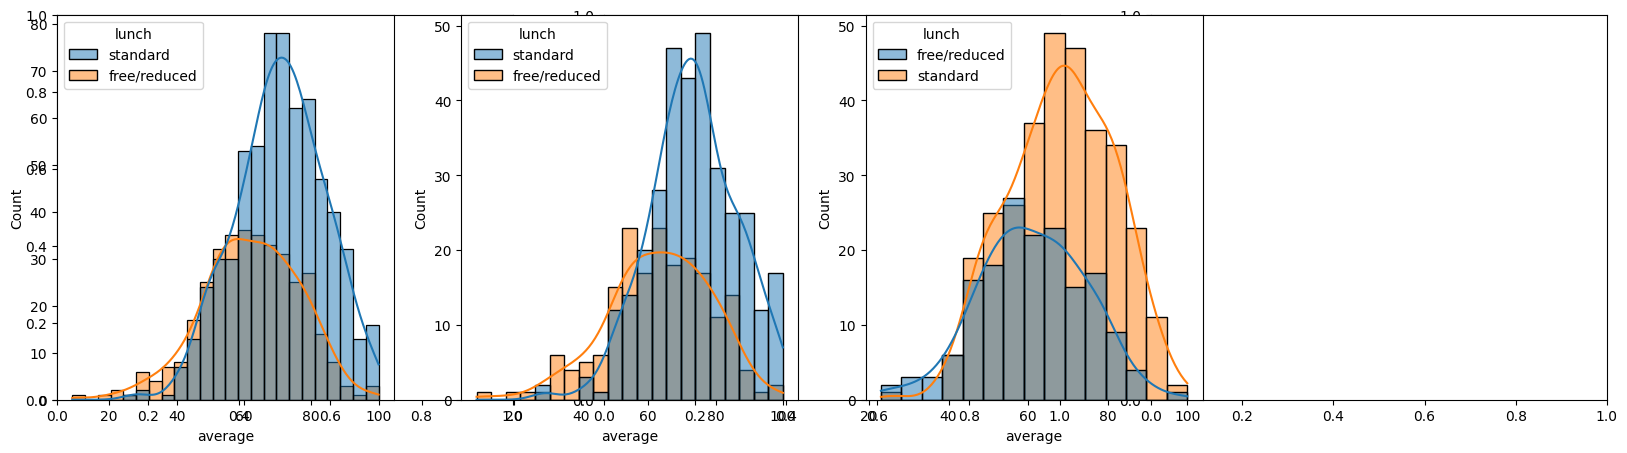

In [67]:
plt.subplots(1,3, figsize=(20,5))
plt.subplot(141)
sns.histplot(data=df,x='average', kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average', kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()


### Insights
    - Standard lunch helps perform well in exams.
    - Standard lunch helps perform well in exams be it a male or a female.

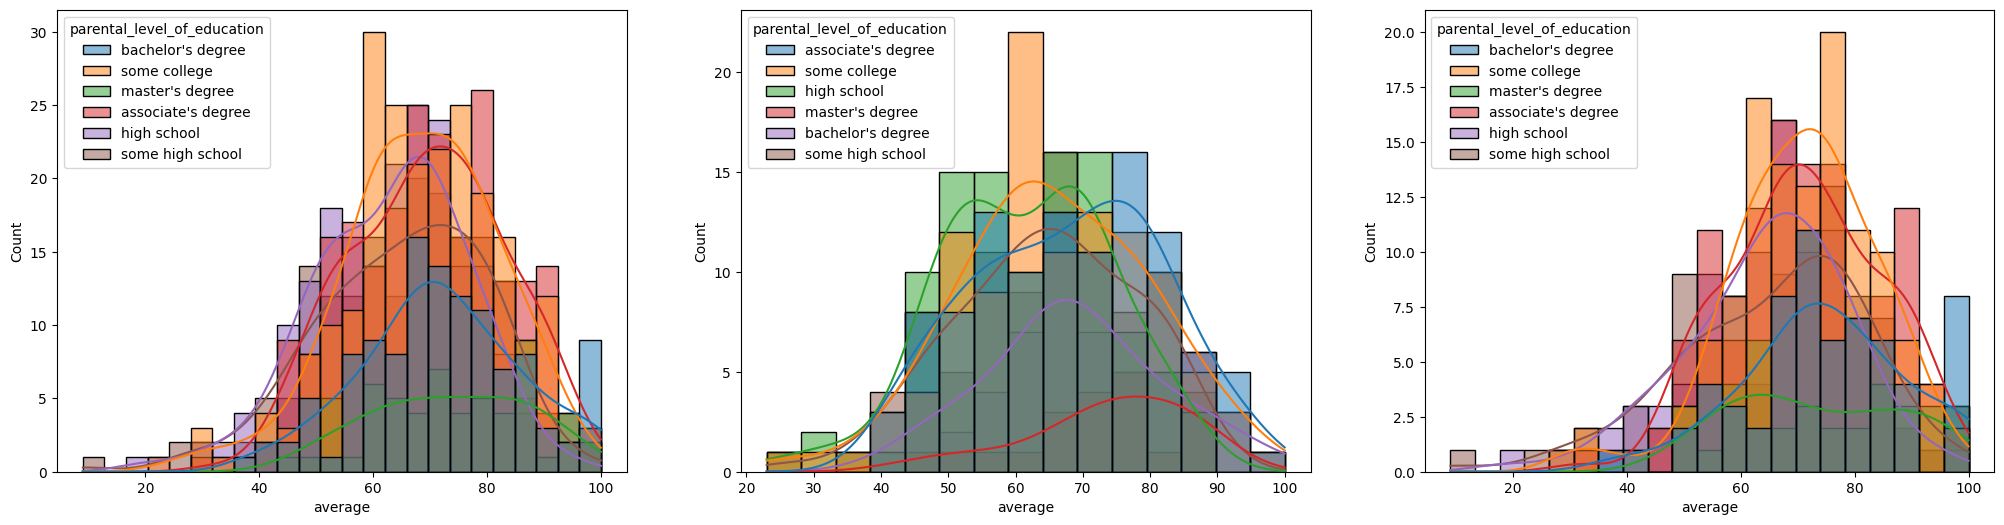

In [77]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax = sns.histplot(data=df, x='average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
ax = sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax = sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

### Insights
    - In general parent's education don't help student perform well in exam.
    - 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
    - 3rd plot we can see there is no effect of parent's education on female students

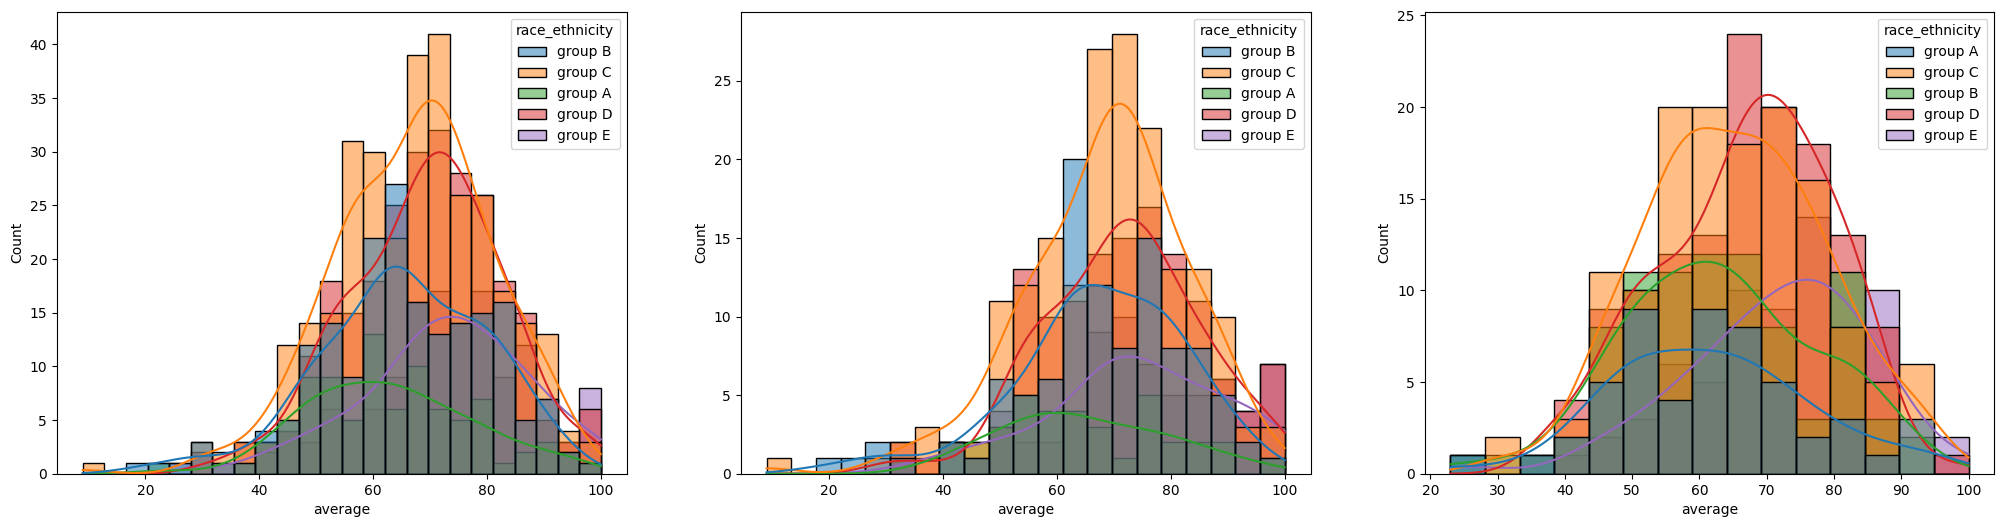

In [82]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot (131)
ax = sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax = sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax = sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

### Insights
    - Students of group A and group B tends to have a poor performance in exam.
    -  Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female.

### 4.2 Maximum score of students in all three subjects


<Axes: title={'center': 'Writing Scores'}, ylabel='writing_score'>

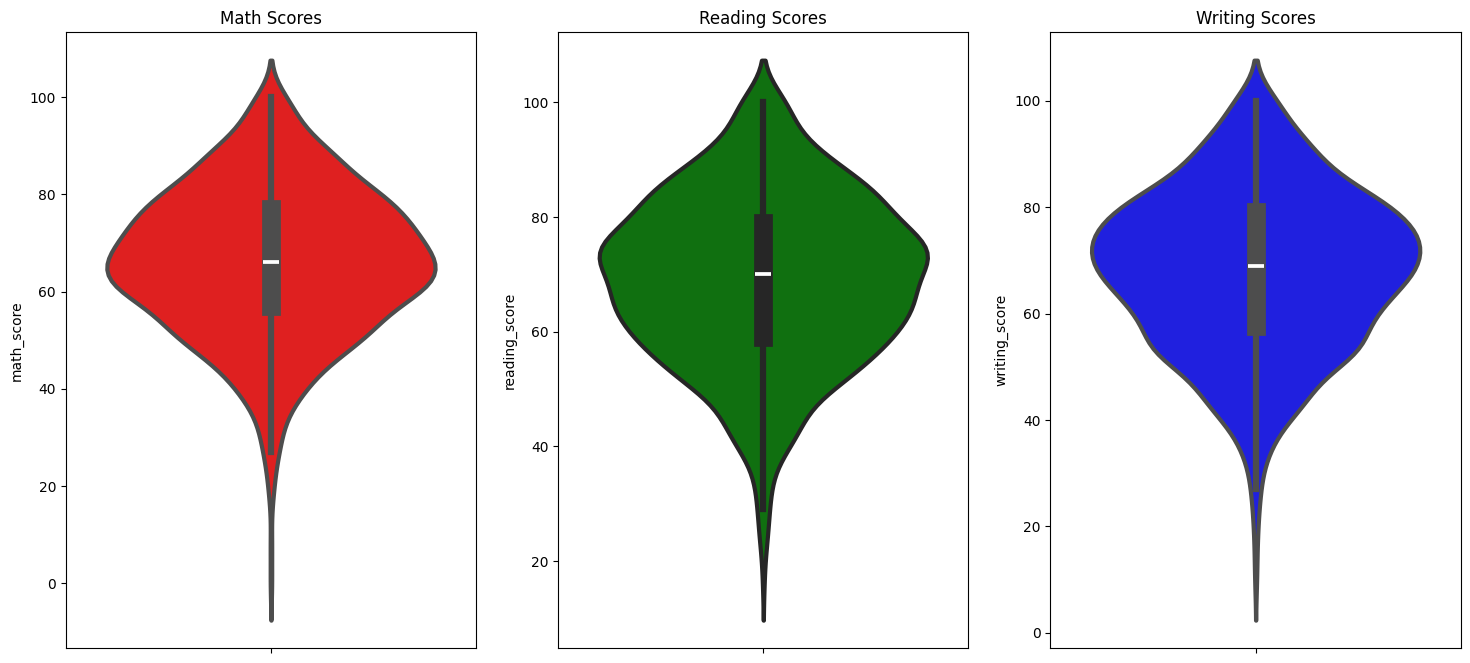

In [7]:
plt.figure(figsize=(18,8))
plt.subplot(131)
plt.title('Math Scores')
sns.violinplot(y='math_score', data=df,color='red', linewidth=3)
plt.subplot(132)
plt.title('Reading Scores')
sns.violinplot(y='reading_score', data=df,color='green', linewidth=3)
plt.subplot(133)
plt.title('Writing Scores')
sns.violinplot(y='writing_score', data=df,color='blue',linewidth=3)

### Insights
    - Fromthe above three plots its clearly visible that most of the students score in between 60-80 in maths whereas in reading and writing most of them score from 50-80.
### 4.3 Multivariable analysis using pieplot


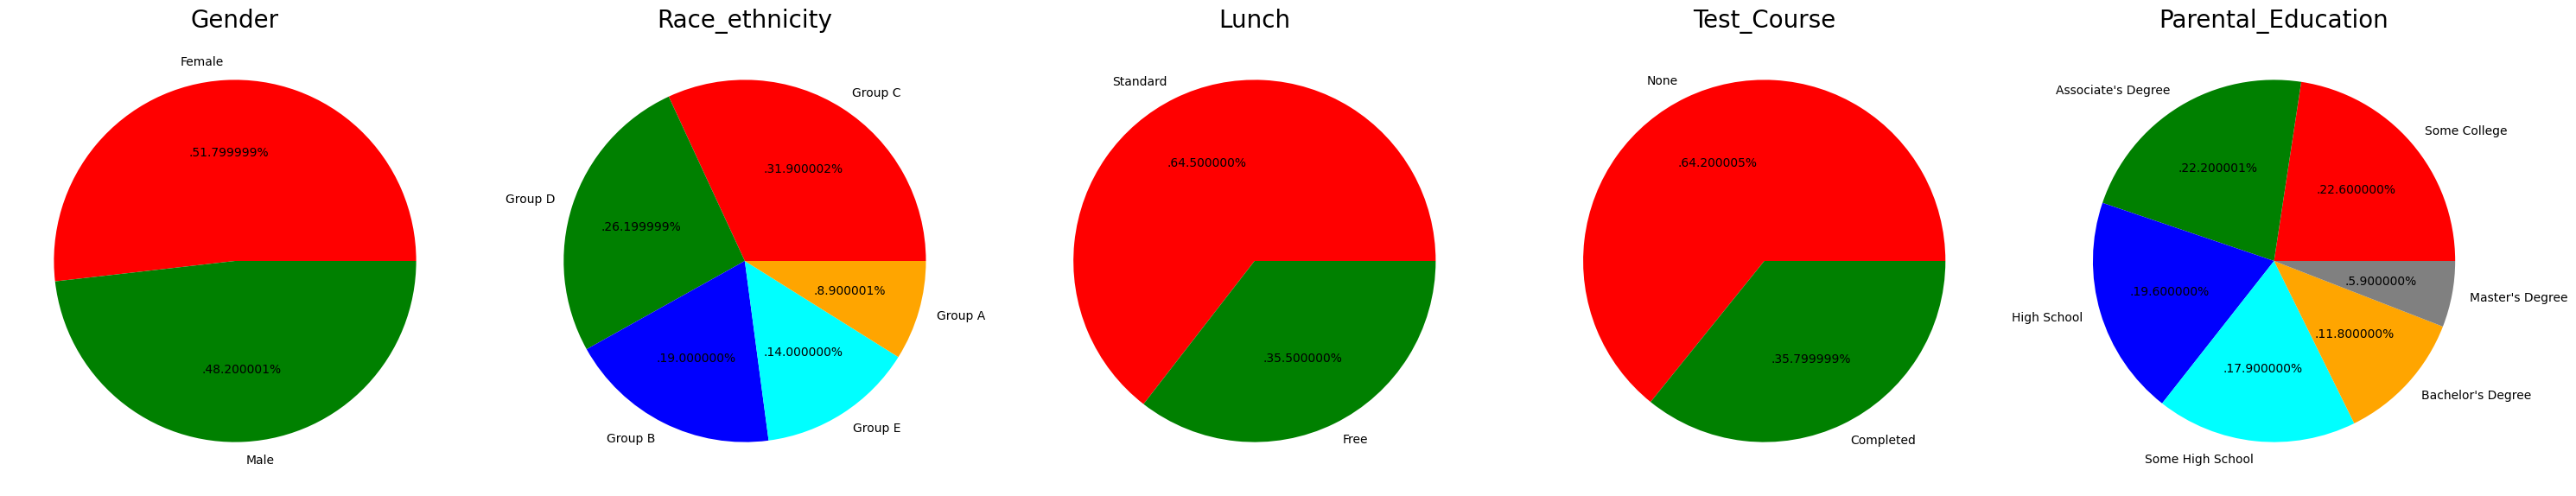

In [ ]:
plt.rcParams['figure.figsize'] = (30, 12)
plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Race_ethnicity', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test_Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental_Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### Insights
    - Number of Male and Female students is almost equal.
    - Number students are greatest in Group C.
    - Number of students who have standard lunch are greater
    - Number of students who have not enrolled in any test preparation course is greater
    - Number of students whose parental education is "Some college" is greater followed closely by "Associate's Degree".

### 4.4 Feature Wise Visualization
#### 4.4.1 Gender Column
    - How is distribution of gender?
    - is gender has any impact on student's performace?

### Univariate Analysis(How is distribution of gender?)


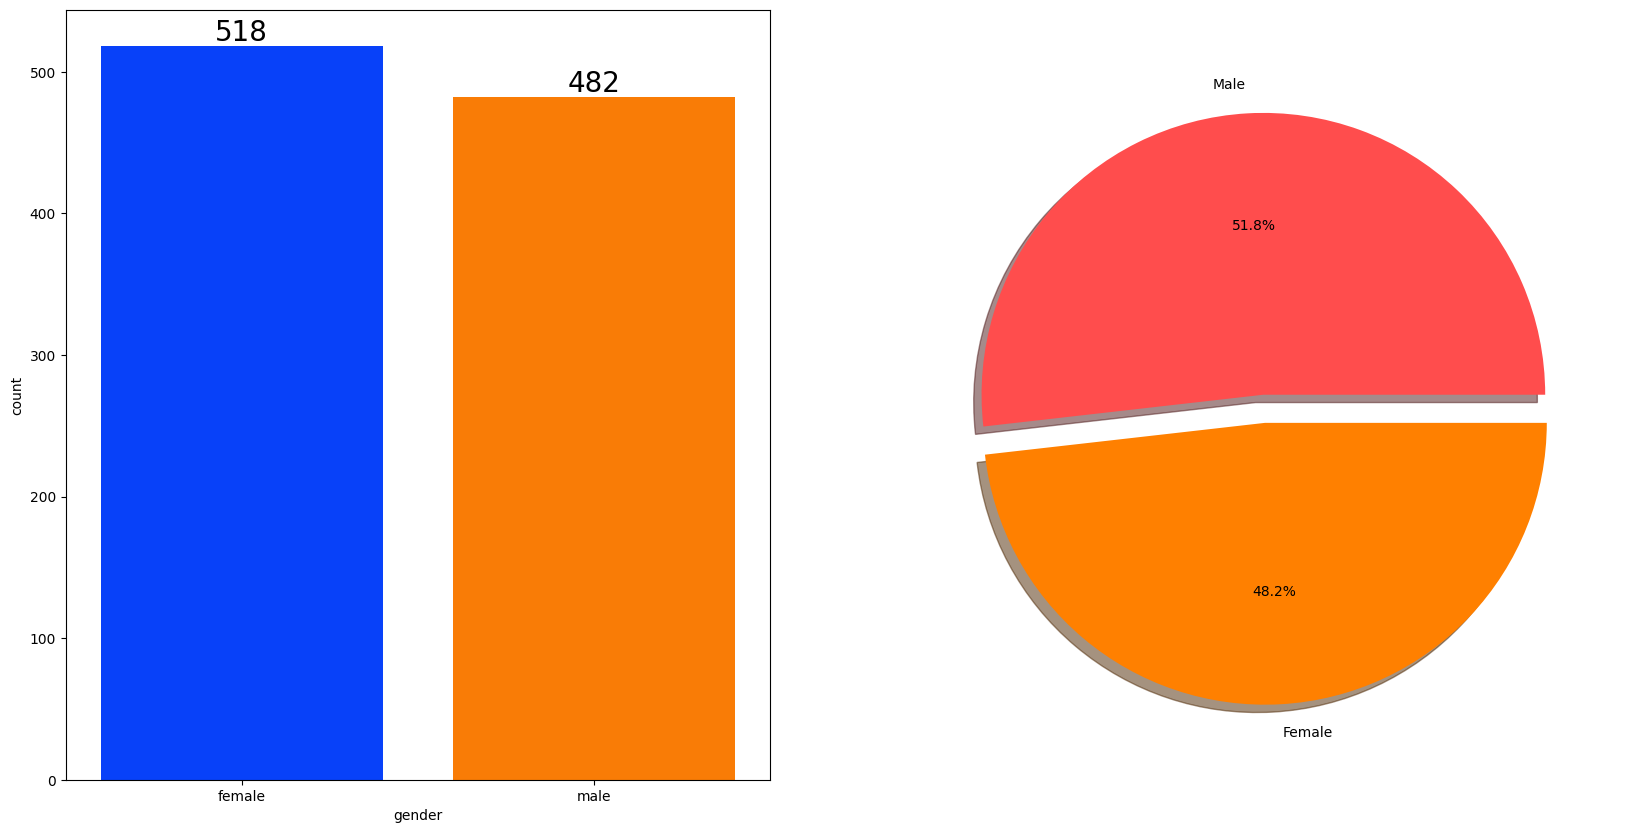

In [11]:
f, ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'], data=df,palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black', size=20)
plt.pie(x=df['gender'].value_counts(),labels=['Male', 'Female'],explode=[0,0.1], autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

### Insights
    - Gender has balanced data with female students are 518(48%) and male students are 482 (52%)

###Bivariate analysis (is gender has any impact on student's performance?)


In [16]:
gender_group = df.groupby('gender').mean()
gender_group

TypeError: agg function failed [how->mean,dtype->object]